#### Business issues of the project

1) What are the most crucial features that impact "overall rating" of a soccer player ?

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cnx=sqlite3.connect('C:\\Users\\Gaya\\Desktop\\PYTHON\\Data_Science_Microsoft\\Tasks\\database.sqlite')


In [3]:
res = cnx.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in res:
    print (name[0])

sqlite_sequence
Player_Attributes
Player
Match
League
Country
Team
Team_Attributes


In [4]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
df_1 = pd.read_sql_query("SELECT * FROM sqlite_sequence", cnx)
df_2 = pd.read_sql_query("SELECT * FROM Player", cnx)
df_3 = pd.read_sql_query("SELECT * FROM Match", cnx)
df_4 = pd.read_sql_query("SELECT * FROM League", cnx)
df_5 = pd.read_sql_query("SELECT * FROM Country", cnx)
df_6 = pd.read_sql_query("SELECT * FROM Team", cnx)
df_7 = pd.read_sql_query("SELECT * FROM Team_Attributes", cnx)

In [5]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

In [7]:
df[df.isnull().any(axis=1)].shape

(3624, 42)

In [8]:
df=df.dropna()

In [9]:
df.shape

(180354, 42)

In [10]:
180354+3624

183978

In [11]:
df.isnull().any()

id                     False
player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating         False
potential              False
preferred_foot         False
attacking_work_rate    False
defensive_work_rate    False
crossing               False
finishing              False
heading_accuracy       False
short_passing          False
volleys                False
dribbling              False
curve                  False
free_kick_accuracy     False
long_passing           False
ball_control           False
acceleration           False
sprint_speed           False
agility                False
reactions              False
balance                False
shot_power             False
jumping                False
stamina                False
strength               False
long_shots             False
aggression             False
interceptions          False
positioning            False
vision                 False
penalties              False
marking       

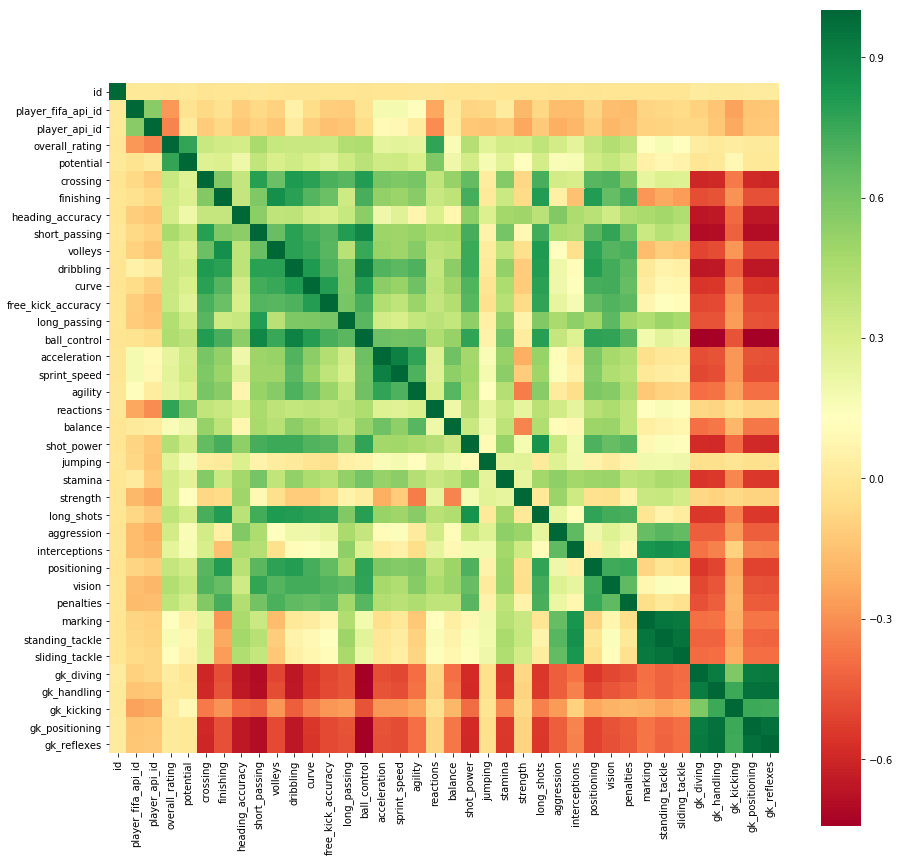

In [12]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn') #for building correlation heatmap

In [13]:
df_cor=df.corr()

In [14]:
df_cor

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003744,0.002048,-0.003738,0.000837,-0.020231,-0.008171,-0.011781,-0.006701,-0.006916,...,-0.007928,-0.011751,-0.010329,-0.012515,-0.011101,0.014251,0.010911,0.008758,0.014015,0.014671
player_fifa_api_id,0.003744,1.000000,0.556557,-0.278703,-0.021252,-0.065631,-0.029836,-0.103500,-0.065311,-0.088726,...,-0.163099,-0.175255,-0.075568,-0.071128,-0.055218,-0.092945,-0.138844,-0.248222,-0.140925,-0.131531
player_api_id,0.002048,0.556557,1.000000,-0.328315,0.010588,-0.113365,-0.062312,-0.130282,-0.090237,-0.131262,...,-0.188087,-0.162481,-0.089772,-0.086706,-0.073595,-0.071825,-0.125345,-0.229704,-0.125525,-0.121947
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,...,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
crossing,-0.020231,-0.065631,-0.113365,0.357320,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,...,0.693978,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696
finishing,-0.008171,-0.029836,-0.062312,0.330079,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,...,0.652376,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302
heading_accuracy,-0.011781,-0.103500,-0.130282,0.313324,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,...,0.336472,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,...,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
volleys,-0.006916,-0.088726,-0.131262,0.361739,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,...,0.690716,0.713116,-0.170094,-0.108062,-0.127810,-0.508029,-0.486178,-0.279492,-0.490148,-0.492267


In [15]:
df_cor[df_cor['overall_rating']>0.4]

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,...,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,...,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
long_passing,-0.008137,-0.111272,-0.139584,0.434525,0.343133,0.685649,0.341121,0.362741,0.803073,0.414520,...,0.670151,0.476750,0.441837,0.496679,0.462544,-0.464221,-0.466906,-0.261361,-0.468453,-0.469598
ball_control,-0.013976,-0.024942,-0.053940,0.443991,0.401803,0.807721,0.720694,0.550956,0.890622,0.749459,...,0.773185,0.684410,0.188479,0.252325,0.220588,-0.741678,-0.732701,-0.465803,-0.735166,-0.738085
reactions,-0.005740,-0.233465,-0.312538,0.771856,0.580991,0.384999,0.354769,0.295601,0.460469,0.397448,...,0.452559,0.390045,0.123173,0.159255,0.137098,-0.073940,-0.079753,-0.033067,-0.078091,-0.078300
shot_power,-0.010371,-0.080175,-0.126514,0.428053,0.325459,0.656740,0.727835,0.541365,0.722320,0.746622,...,0.647262,0.680887,0.094068,0.155941,0.117569,-0.584551,-0.589048,-0.398712,-0.591626,-0.593827
vision,-0.007928,-0.163099,-0.188087,0.431493,0.379278,0.693978,0.652376,0.336472,0.766401,0.690716,...,1.000000,0.665802,0.080042,0.144749,0.118656,-0.502582,-0.461778,-0.201738,-0.465109,-0.470499


In [16]:
features=df_cor[df_cor['overall_rating']>0.4].index

In [17]:
features=list(features)

In [18]:
features

['overall_rating',
 'potential',
 'short_passing',
 'long_passing',
 'ball_control',
 'reactions',
 'shot_power',
 'vision']

## Making linear model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [20]:
feat_df=df[features]

In [21]:
feat_df

,overall_rating,potential,short_passing,long_passing,ball_control,reactions,shot_power,vision
0,67.0,71.0,61.0,64.0,49.0,47.0,55.0,54.0
1,67.0,71.0,61.0,64.0,49.0,47.0,55.0,54.0
2,62.0,66.0,61.0,64.0,49.0,47.0,55.0,54.0
3,61.0,65.0,60.0,63.0,48.0,46.0,54.0,53.0
4,61.0,65.0,60.0,63.0,48.0,46.0,54.0,53.0
5,74.0,76.0,71.0,68.0,71.0,67.0,71.0,66.0
6,74.0,76.0,71.0,68.0,71.0,67.0,71.0,66.0
7,73.0,75.0,70.0,68.0,70.0,67.0,71.0,65.0
8,73.0,75.0,70.0,68.0,70.0,67.0,71.0,65.0
9,73.0,75.0,70.0,68.0,70.0,67.0,71.0,65.0


In [22]:
y=feat_df['overall_rating']

In [23]:
y.shape

(180354,)

In [24]:
X=feat_df.drop('overall_rating',axis=1)

In [25]:
X.shape

(180354, 7)

In [26]:
X

,potential,short_passing,long_passing,ball_control,reactions,shot_power,vision
0,71.0,61.0,64.0,49.0,47.0,55.0,54.0
1,71.0,61.0,64.0,49.0,47.0,55.0,54.0
2,66.0,61.0,64.0,49.0,47.0,55.0,54.0
3,65.0,60.0,63.0,48.0,46.0,54.0,53.0
4,65.0,60.0,63.0,48.0,46.0,54.0,53.0
5,76.0,71.0,68.0,71.0,67.0,71.0,66.0
6,76.0,71.0,68.0,71.0,67.0,71.0,66.0
7,75.0,70.0,68.0,70.0,67.0,71.0,65.0
8,75.0,70.0,68.0,70.0,67.0,71.0,65.0
9,75.0,70.0,68.0,70.0,67.0,71.0,65.0


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [28]:
reg=LinearRegression()

In [29]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
X_train

,potential,short_passing,long_passing,ball_control,reactions,shot_power,vision
51702,84.0,67.0,50.0,65.0,78.0,73.0,59.0
36004,77.0,74.0,60.0,74.0,77.0,53.0,58.0
183384,81.0,83.0,73.0,73.0,70.0,45.0,70.0
145066,73.0,65.0,32.0,59.0,66.0,70.0,63.0
53759,72.0,65.0,61.0,60.0,67.0,67.0,55.0
61306,83.0,63.0,61.0,64.0,79.0,63.0,56.0
100469,81.0,62.0,59.0,63.0,67.0,72.0,61.0
125276,70.0,66.0,56.0,65.0,65.0,64.0,58.0
72854,69.0,56.0,62.0,56.0,67.0,36.0,57.0
142778,65.0,64.0,59.0,60.0,58.0,67.0,64.0


In [31]:
y_train

51702     72.0
36004     75.0
183384    77.0
145066    69.0
53759     69.0
61306     80.0
100469    68.0
125276    70.0
72854     67.0
142778    62.0
6564      75.0
58534     67.0
116996    68.0
95046     73.0
118632    66.0
134843    65.0
11745     68.0
38619     75.0
153854    53.0
80705     69.0
122425    70.0
106917    66.0
114154    71.0
110022    72.0
15495     85.0
87215     74.0
30813     65.0
94871     62.0
141265    62.0
94179     59.0
          ... 
77352     69.0
161782    74.0
27160     72.0
79567     65.0
113684    71.0
25420     72.0
61160     83.0
37508     65.0
1039      68.0
64709     70.0
60212     68.0
54393     72.0
162080    83.0
64575     66.0
146367    68.0
141940    68.0
124141    67.0
65338     75.0
25590     82.0
178299    66.0
33261     68.0
26019     64.0
161349    75.0
132326    60.0
71457     75.0
148191    66.0
52839     57.0
90084     75.0
15573     74.0
58520     67.0
Name: overall_rating, Length: 120837, dtype: float64

In [32]:
reg.score(X_train,y_train)

0.76001433533514295

In [33]:
reg.score(X_test,y_test)

0.75516033358072976

In [34]:
reg.coef_

array([ 0.50306923,  0.00341137,  0.05215445, -0.0400485 ,  0.35475287,
        0.04596546, -0.01614033])

In [35]:
reg.intercept_

5.654440712851553

In [36]:
y_pred=reg.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [38]:
sqrt(mean_squared_error(y_true=y_test,y_pred=y_pred))

3.4697646603713275

In [39]:
from sklearn.metrics import r2_score

r2_score(y_true=y_test,y_pred=y_pred)

0.75516033358072976

In [40]:
X.columns

Index(['potential', 'short_passing', 'long_passing', 'ball_control',
       'reactions', 'shot_power', 'vision'],
      dtype='object')

In [41]:
X.shape

(180354, 7)

In [42]:
y.shape

(180354,)

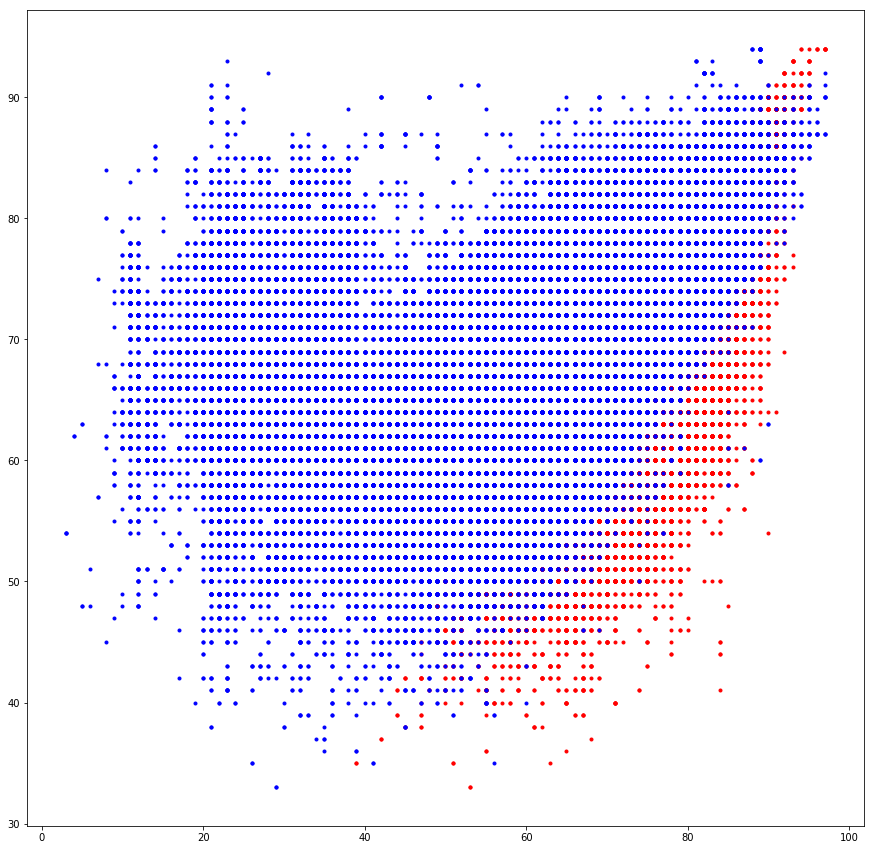

In [43]:
plt.figure(figsize=(15,15))
plt.scatter(X['potential'], y,marker='.', color='red', label='potential')
plt.scatter(X['short_passing'], y,marker='.', color='blue', label='potential')


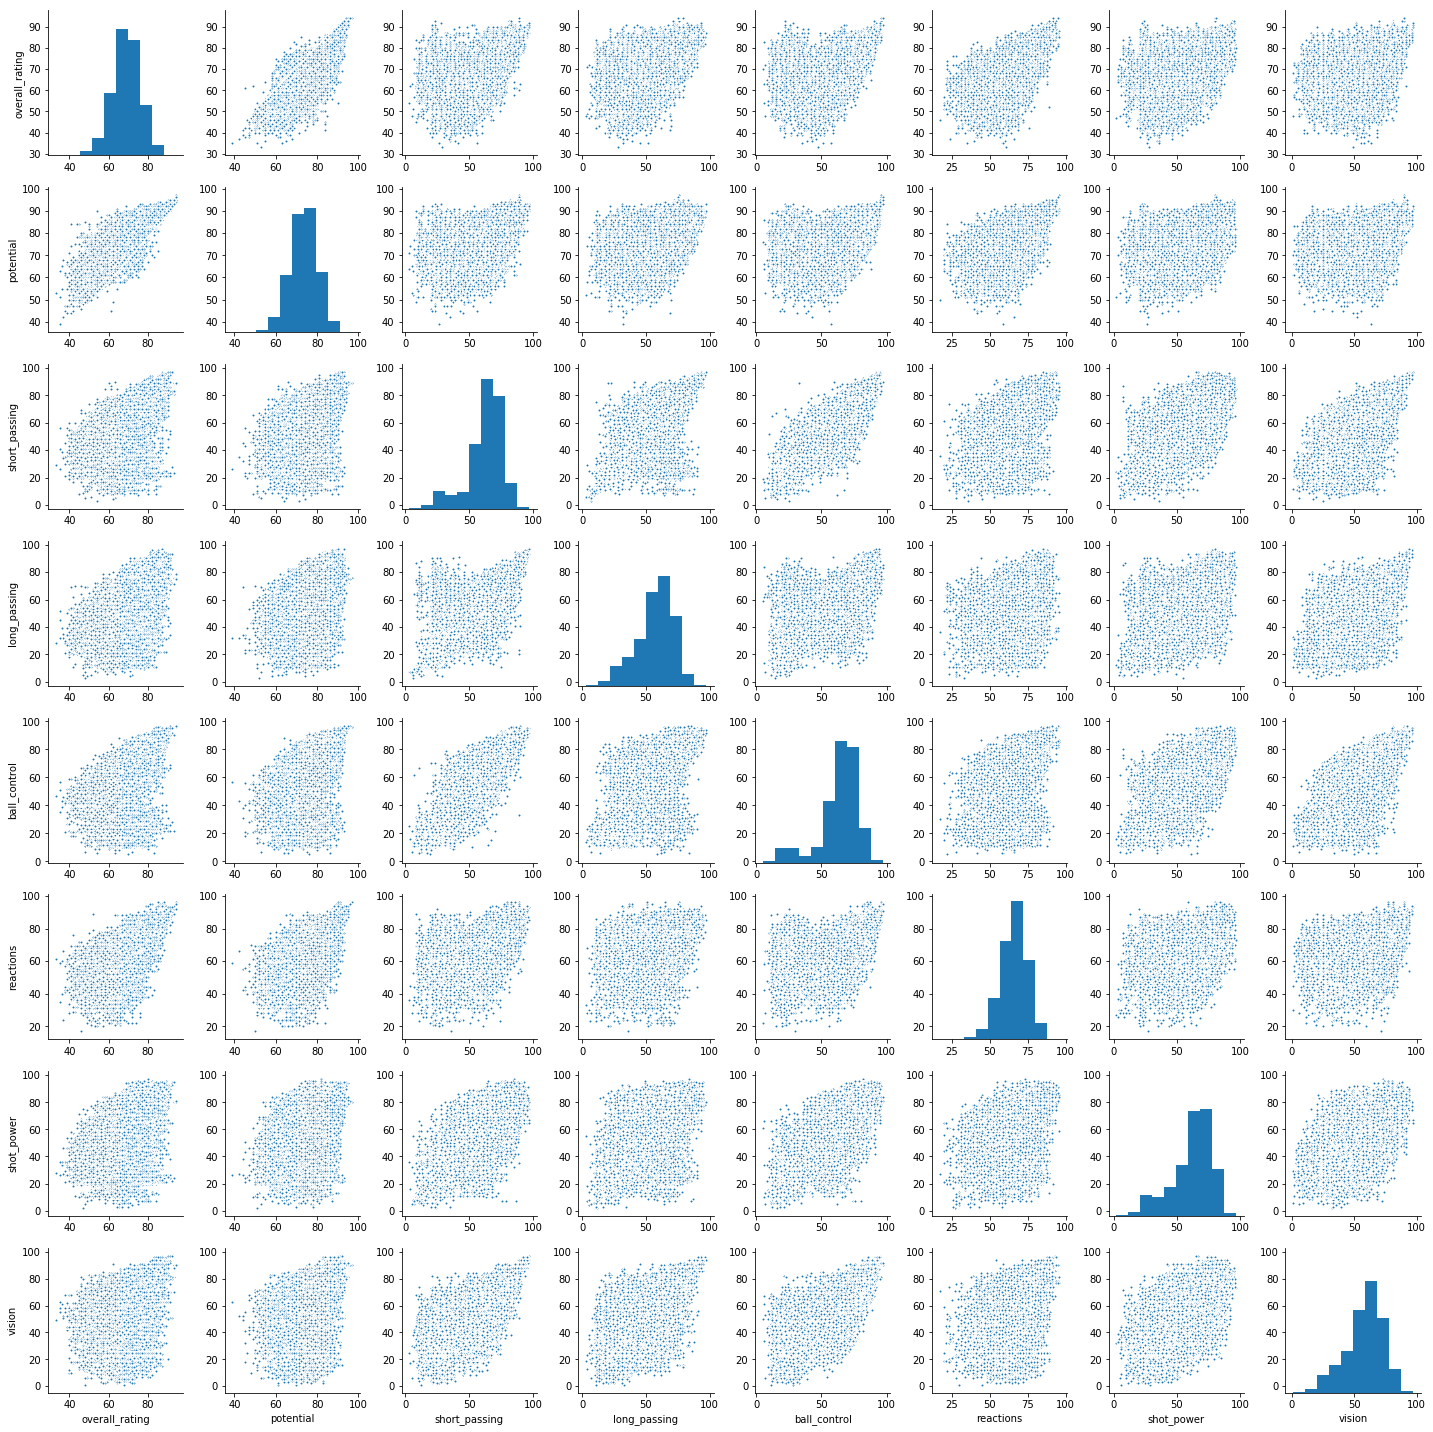

In [44]:
sns.pairplot(feat_df,markers='.')

In [45]:
plt.show()

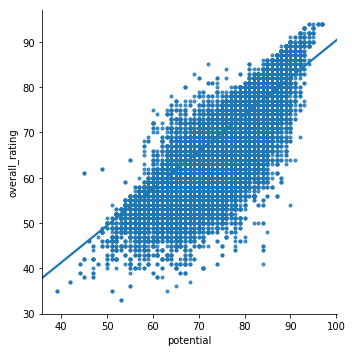

In [46]:
sns.lmplot(x='potential', y='overall_rating', data=feat_df,palette='Set1',markers='.')
plt.figure()

# Cross-validation

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cv_res=cross_val_score(reg,X,y,cv=3)

In [49]:
np.mean(cv_res)

0.75832795587785984

In [50]:
for i in range(2,10):
    cv_res=cross_val_score(reg,X,y,cv=i)
    m=np.mean(cv_res)
    print('CV={} : {}-- av.score: {}'.format(i,cv_res,m))

CV=2 : [ 0.75582841  0.7607481 ]-- av.score: 0.7582882545878527
CV=3 : [ 0.76025769  0.75239418  0.762332  ]-- av.score: 0.7583279558778598
CV=4 : [ 0.76350211  0.74770023  0.7555701   0.76568391]-- av.score: 0.758114087941125
CV=5 : [ 0.76290691  0.74873177  0.75016448  0.7647035   0.76386649]-- av.score: 0.7580746307917672
CV=6 : [ 0.76124659  0.75908547  0.74672505  0.75766449  0.75801583  0.76594695]-- av.score: 0.7581140614438975
CV=7 : [ 0.76077122  0.76251789  0.74736902  0.74602877  0.76608625  0.75576943
  0.76764233]-- av.score: 0.7580264146960985
CV=8 : [ 0.76360848  0.7630341   0.74118731  0.75367979  0.74999489  0.76130268
  0.76600113  0.76491728]-- av.score: 0.7579657083155322
CV=9 : [ 0.77196777  0.75620087  0.74999391  0.74771135  0.74480779  0.76329248
  0.76013292  0.76251103  0.76357088]-- av.score: 0.7577987773781051


# Cross validation results

In case of cv=6 accuracy score is around 75.8%,practically the same for scores without cross-validation (2/3-train set, 1/3--test set)75,9%-train score, 75,6% for-test score.
In order to comprehensively cover the **1-st question** let's also conduct analysis using Lassso method.The purpose is to identify the most crucial features for overall_score as additional proof for already identified ones.

Features identified using correlation analysis.
['potential', 'short_passing', 'long_passing', 'ball_control',
       'reactions', 'shot_power', 'vision']

# Lasso method

In [51]:
from sklearn.linear_model import Lasso

In [52]:
X.columns
y

0         67.0
1         67.0
2         62.0
3         61.0
4         61.0
5         74.0
6         74.0
7         73.0
8         73.0
9         73.0
10        73.0
11        74.0
12        73.0
13        71.0
14        71.0
15        71.0
16        70.0
17        70.0
18        70.0
19        70.0
20        70.0
21        70.0
22        69.0
23        69.0
24        69.0
25        69.0
26        69.0
27        69.0
28        69.0
29        68.0
          ... 
183933    76.0
183934    75.0
183935    77.0
183936    77.0
183937    63.0
183938    63.0
183939    63.0
183940    63.0
183941    63.0
183942    66.0
183943    66.0
183944    66.0
183945    66.0
183946    66.0
183947    68.0
183948    68.0
183949    68.0
183950    68.0
183951    67.0
183952    67.0
183968    78.0
183969    81.0
183970    81.0
183971    81.0
183972    83.0
183973    83.0
183974    78.0
183975    77.0
183976    78.0
183977    80.0
Name: overall_rating, Length: 180354, dtype: float64

In [53]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [54]:
df_new=df.drop(['id', 'player_fifa_api_id', 'player_api_id','date','preferred_foot', 'attacking_work_rate',
       'defensive_work_rate'],axis=1)

In [55]:
X.shape


(180354, 7)

In [56]:
y.shape

(180354,)

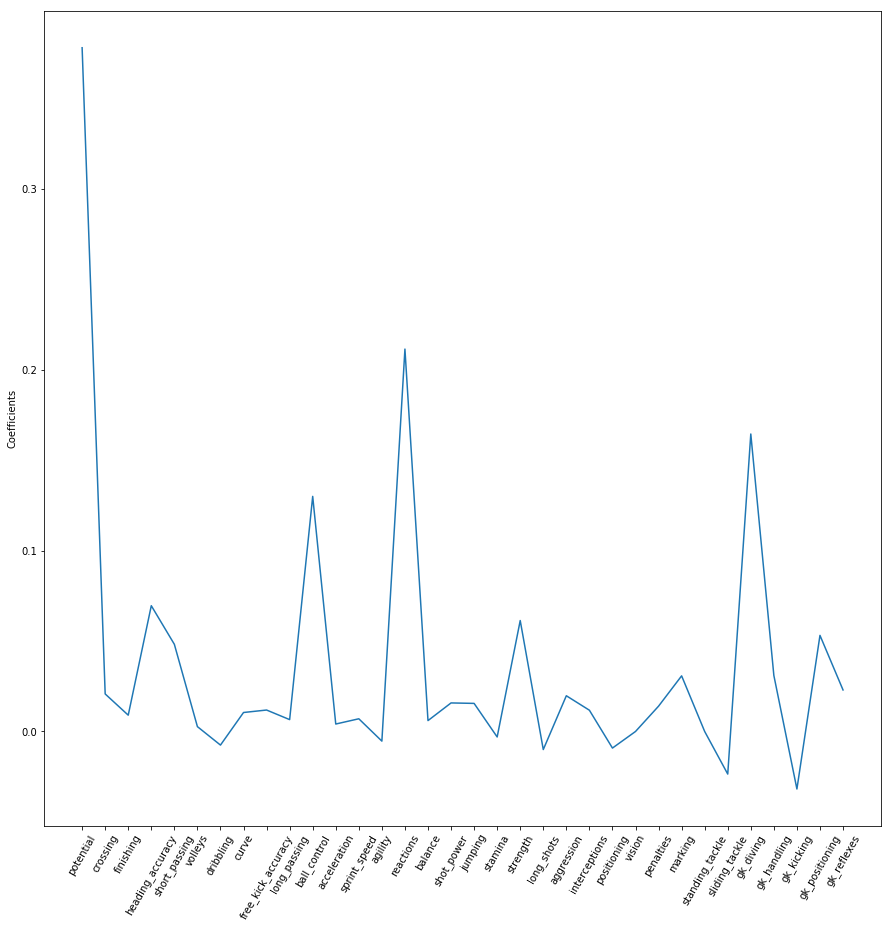

In [57]:
X_n=df_new.drop('overall_rating', axis=1)
y_n=df_new['overall_rating']
names = df_new.drop('overall_rating', axis=1).columns
lasso = Lasso(alpha=0.1)
plt.figure(figsize=(15,15))
lasso_coef = lasso.fit(X_n, y_n).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')

plt.show()


### As we may observe Lasso method identified most crucial features:


* potential
* heading accuracy
* ball control
* reactions
* strength
* gk handling
* gk reflexes


In [58]:
X.columns

Index(['potential', 'short_passing', 'long_passing', 'ball_control',
       'reactions', 'shot_power', 'vision'],
      dtype='object')

## As we may observe some features appeaes in both methods, but there are diferences. So let's investigate them.

In [59]:
df.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003744,0.002048,-0.003738,0.000837,-0.020231,-0.008171,-0.011781,-0.006701,-0.006916,...,-0.007928,-0.011751,-0.010329,-0.012515,-0.011101,0.014251,0.010911,0.008758,0.014015,0.014671
player_fifa_api_id,0.003744,1.000000,0.556557,-0.278703,-0.021252,-0.065631,-0.029836,-0.103500,-0.065311,-0.088726,...,-0.163099,-0.175255,-0.075568,-0.071128,-0.055218,-0.092945,-0.138844,-0.248222,-0.140925,-0.131531
player_api_id,0.002048,0.556557,1.000000,-0.328315,0.010588,-0.113365,-0.062312,-0.130282,-0.090237,-0.131262,...,-0.188087,-0.162481,-0.089772,-0.086706,-0.073595,-0.071825,-0.125345,-0.229704,-0.125525,-0.121947
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,...,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
crossing,-0.020231,-0.065631,-0.113365,0.357320,0.277284,1.000000,0.576896,0.368956,0.790323,0.637527,...,0.693978,0.574208,0.234886,0.285018,0.274673,-0.604567,-0.595646,-0.356728,-0.597742,-0.601696
finishing,-0.008171,-0.029836,-0.062312,0.330079,0.287838,0.576896,1.000000,0.373459,0.580245,0.851482,...,0.652376,0.726234,-0.285416,-0.230453,-0.262144,-0.479370,-0.465135,-0.292349,-0.470758,-0.473302
heading_accuracy,-0.011781,-0.103500,-0.130282,0.313324,0.206063,0.368956,0.373459,1.000000,0.548435,0.391129,...,0.336472,0.431291,0.460831,0.480054,0.441134,-0.665600,-0.649145,-0.402865,-0.648981,-0.652494
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,...,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
volleys,-0.006916,-0.088726,-0.131262,0.361739,0.301678,0.637527,0.851482,0.391129,0.639995,1.000000,...,0.690716,0.713116,-0.170094,-0.108062,-0.127810,-0.508029,-0.486178,-0.279492,-0.490148,-0.492267


As you may see there are some dicrepancies.. For instance Lasso method shows that gk_diving has predicitve power, or some influence over target variable but correlation analysis has shown only 2.6% positive correlation... Again thisprove sthat we should never fully trust a single method!!!!

But two most crucial features have shown stability in both methods: **potential and reactions!!!**

In [60]:
df_1

,name,seq
0,Team,103916
1,Country,51958
2,League,51958
3,Match,51958
4,Player,11075
5,Player_Attributes,183978
6,Team_Attributes,1458


In [61]:
df_2

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [62]:
df_0=pd.merge(df, df_2, on = 'player_fifa_api_id', how = 'inner')

In [63]:
df_0

,id_x,player_fifa_api_id,player_api_id_x,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_api_id_y,player_name,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187
5,6,189615,155782,2016-04-21 00:00:00,74.0,76.0,left,high,medium,80.0,...,7.0,9.0,9.0,12.0,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
6,7,189615,155782,2016-04-07 00:00:00,74.0,76.0,left,high,medium,80.0,...,7.0,9.0,9.0,12.0,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
7,8,189615,155782,2016-01-07 00:00:00,73.0,75.0,left,high,medium,79.0,...,7.0,9.0,9.0,12.0,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
8,9,189615,155782,2015-12-24 00:00:00,73.0,75.0,left,high,medium,79.0,...,7.0,9.0,9.0,12.0,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146
9,10,189615,155782,2015-12-17 00:00:00,73.0,75.0,left,high,medium,79.0,...,7.0,9.0,9.0,12.0,2,155782,Aaron Cresswell,1989-12-15 00:00:00,170.18,146


In [64]:
df_0['player_fifa_api_id'].unique().shape

(10410,)

In [65]:
df_0.shape

(180354, 48)

In [66]:
df_0=df_0.dropna()

In [67]:
df_0.shape

(180354, 48)

# Classification

## Using DecisionTreeClassifier

In [68]:
from sklearn.cluster import KMeans

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
from numpy import sqrt
import utils
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates
import numpy as np

%matplotlib inline

In [72]:
df_0.isnull().any()

id_x                   False
player_fifa_api_id     False
player_api_id_x        False
date                   False
overall_rating         False
potential              False
preferred_foot         False
attacking_work_rate    False
defensive_work_rate    False
crossing               False
finishing              False
heading_accuracy       False
short_passing          False
volleys                False
dribbling              False
curve                  False
free_kick_accuracy     False
long_passing           False
ball_control           False
acceleration           False
sprint_speed           False
agility                False
reactions              False
balance                False
shot_power             False
jumping                False
stamina                False
strength               False
long_shots             False
aggression             False
interceptions          False
positioning            False
vision                 False
penalties              False
marking       

In [73]:
df_0['overall_rating'].mean()

68.63531720948801

In [74]:
df_0['overall_rating'].max()

94.0

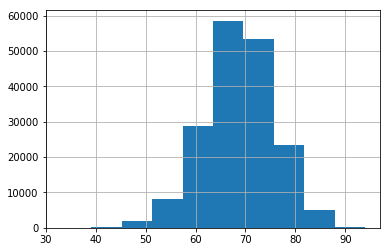

In [75]:
df_0['overall_rating'].hist()


In [76]:
df_0.columns

Index(['id_x', 'player_fifa_api_id', 'player_api_id_x', 'date',
       'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'id_y', 'player_api_id_y', 'player_name', 'birthday',
       'height', 'weight'],
      dtype='object')

In [77]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 180353
Data columns (total 48 columns):
id_x                   180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id_x        180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

In [78]:
df_c_0=df_0.drop(['date','preferred_foot', 'attacking_work_rate',
       'defensive_work_rate','player_name', 'birthday','id_x', 'player_api_id_x'],axis=1)

In [79]:
df_c_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 180353
Data columns (total 40 columns):
player_fifa_api_id    180354 non-null int64
overall_rating        180354 non-null float64
potential             180354 non-null float64
crossing              180354 non-null float64
finishing             180354 non-null float64
heading_accuracy      180354 non-null float64
short_passing         180354 non-null float64
volleys               180354 non-null float64
dribbling             180354 non-null float64
curve                 180354 non-null float64
free_kick_accuracy    180354 non-null float64
long_passing          180354 non-null float64
ball_control          180354 non-null float64
acceleration          180354 non-null float64
sprint_speed          180354 non-null float64
agility               180354 non-null float64
reactions             180354 non-null float64
balance               180354 non-null float64
shot_power            180354 non-null float64
jumping          

In [80]:
X=StandardScaler().fit_transform(df_c_0)

In [81]:
kmeans = KMeans(n_clusters=11)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=11, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [82]:
centers = model.cluster_centers_

In [83]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [84]:
# Function that creates Parallel Plots

def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange','pink','brown','cyan']), None, len(data)))
    plt.figure(figsize=(25,15)).gca().axes.set_ylim([-3,+4])
    plt.xticks(rotation=45)
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [85]:
df_c_0.columns

Index(['player_fifa_api_id', 'overall_rating', 'potential', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'id_y',
       'player_api_id_y', 'height', 'weight'],
      dtype='object')

In [86]:
features_n=['player_fifa_api_id', 'overall_rating', 'potential', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'id_y',
       'player_api_id_y', 'height', 'weight']

In [87]:
P = pd_centers(features_n, centers)


C:\Users\Gaya\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  import sys


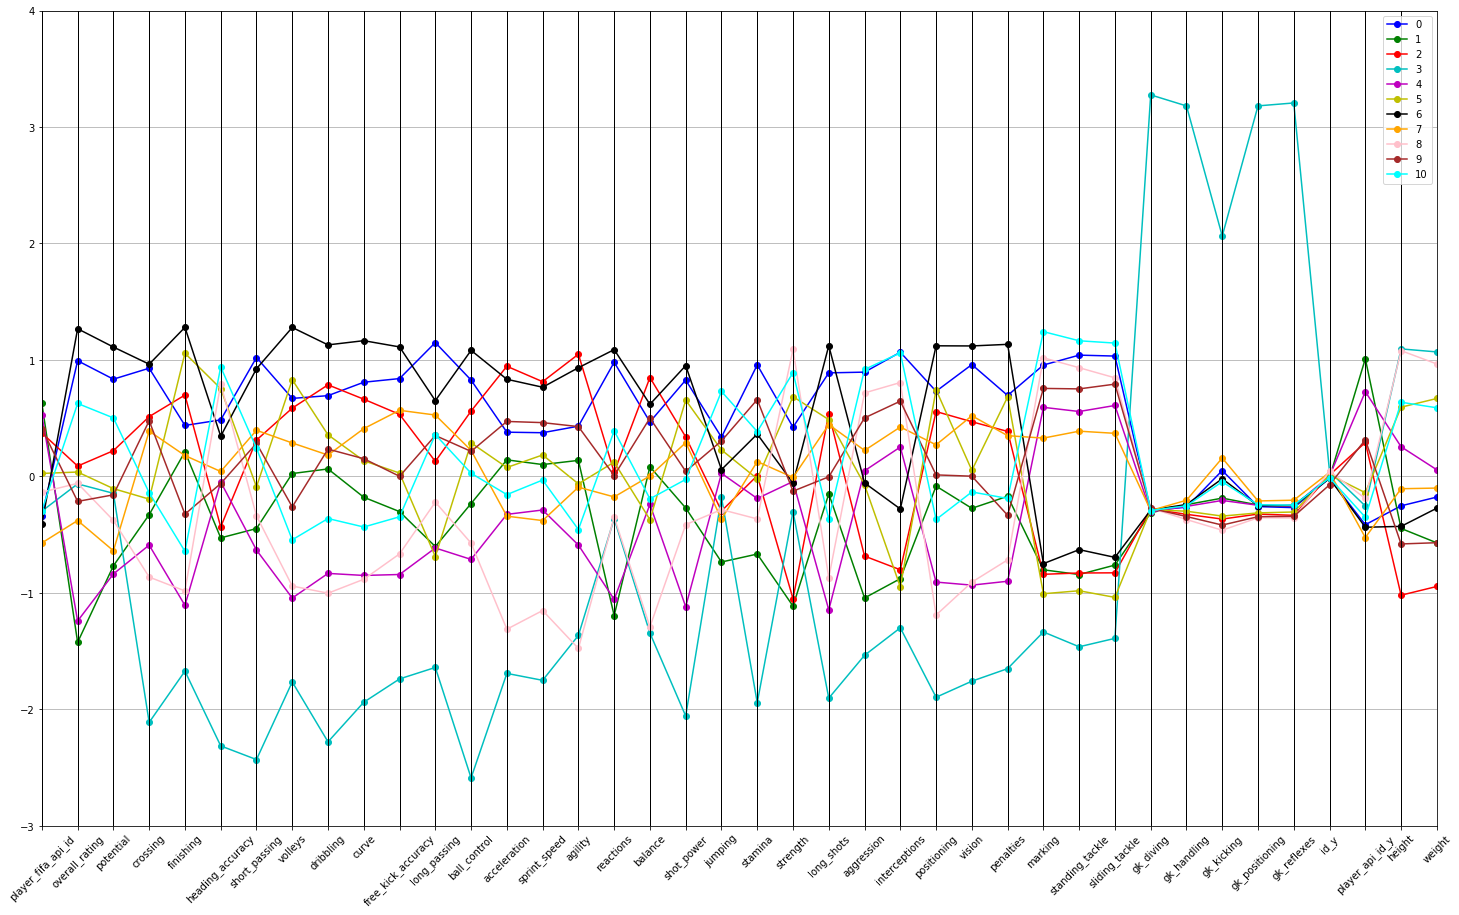

In [88]:
parallel_plot(P)

#### * As we may observe data was divided into 11 clusters.. The first thing that cut the eye is the 2-cluster with red color.. It has negative values in the majority of features but it has the highest values in several categories where other cluster show the worst results.. In my view these clusters may be identified as the major player types and in particular cluster 2 is attributable to goolkeapers... They show humble results in everything besides with gk_ prefix features..*

To be continued...